### LORENZ TEST

In [5]:
import utils
import importlib

importlib.reload(utils)

lorenz, lorenz_time = utils.time_dynamic_system(
    bias_value = None, bias = False, epoch=6000, delta_t=0.02, system=utils.dynamic_lorenz
)
lorenz_x, lorenz_y, lorenz_z = lorenz

In [38]:
import model

importlib.reload(model)
importlib.reload(utils)

RP_lorenz = model.reservoirModel("lorenz.config")
print("W_out before_training:\n", RP_lorenz.W_out)
RP_lorenz.training()
print("W_out after_training:\n", RP_lorenz.W_out)

output_lorenz, _ = RP_lorenz.run_by_self()

forced_output_lorenz, _ = RP_lorenz.run_with_input()

[[ 2.50000000e+01  2.49201145e+01  2.40910477e+01 ... -9.31891537e-01
  -9.70918748e-01 -1.04204917e+00]
 [ 2.50000000e+01  2.32870558e+01  1.69982225e+01 ... -1.04510187e+00
  -1.24661746e+00 -1.47297506e+00]
 [ 2.50000000e+01  3.56637931e+01  4.35882199e+01 ...  1.66049065e+01
   1.57635572e+01  1.49713330e+01]
 [ 2.00000000e-02  2.00000000e-02  2.00000000e-02 ...  2.00000000e-02
   2.00000000e-02  2.00000000e-02]]
W_out before_training:
 tensor([[0.9461, 0.5698, 0.6002, 0.6419],
        [0.7997, 0.4120, 0.3815, 0.6453],
        [0.7260, 0.2422, 0.4490, 0.7949],
        [0.4210, 0.4310, 0.5570, 0.2423],
        [0.9971, 0.9168, 0.9681, 0.7539],
        [0.1567, 0.5288, 0.3390, 0.7699],
        [0.7141, 0.3173, 0.0418, 0.6898],
        [0.6264, 0.5641, 0.4882, 0.5116],
        [0.2336, 0.7727, 0.6842, 0.1416],
        [0.4951, 0.7414, 0.6534, 0.7438],
        [0.5346, 0.2135, 0.0576, 0.7869],
        [0.5558, 0.0770, 0.8291, 0.2123],
        [0.6022, 0.5288, 0.6940, 0.0557],
        [

[25.         24.92011453 24.09104768 ... -0.93189154 -0.97091875
 -1.04204917] tensor([21.4340, 21.2813, 23.3237, 25.4312], dtype=torch.float64)


/tmp/ipykernel_72032/1585922758.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(output_lorenz),


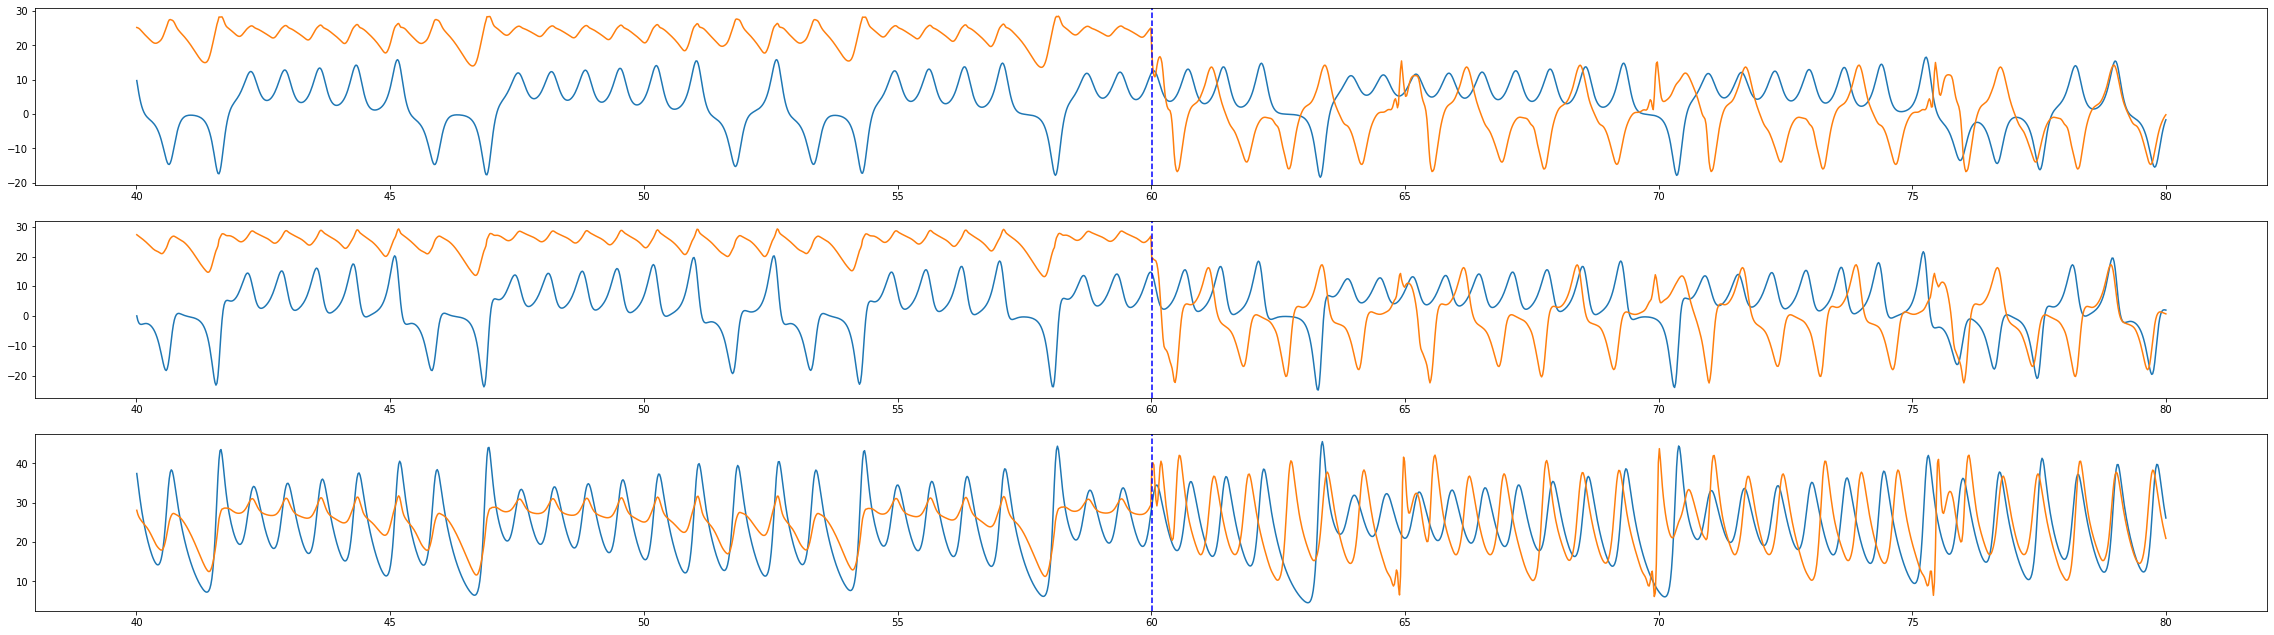

In [39]:
import torch
import numpy as np
import importlib
import utils

importlib.reload(utils)
print(lorenz[0], output_lorenz[0])
# utils.plot_time_sequence(RP_lorenz.training_time,RP_lorenz.training_time+1000,RP_lorenz.training_time,RP_lorenz.f,torch.tensor(output_lorenz),torch.tensor(lorenz).T,time,3)
lorenz_time = np.linspace(0, RP_lorenz.run_time * RP_lorenz.d_t, RP_lorenz.run_time)
utils.plot_time_sequence(
    RP_lorenz.training_time - 1000,
    RP_lorenz.training_time + 1000,
    RP_lorenz.training_time,
    RP_lorenz.f,
    torch.tensor(output_lorenz),
    torch.tensor(lorenz).T,
    lorenz_time,
    3,
)

# import numpy as np
# import matplotlib.pyplot as plt
# fig2=plt.figure()
# fig2.set_figwidth(40)
# fig2.set_figheight(15)

# print(output[0])
# plt.subplot(311)
# plt.plot(time[1000:1200],lorenz_x[1000:1200])
# plt.plot(time[1000:1200],(output.T[0][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[0][1005:1205])
# plt.subplot(312)
# plt.plot(time[1000:1200],lorenz_y[1000:1200])
# plt.plot(time[1000:1200],(output.T[1][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[1][1005:1205])
# plt.subplot(313)
# plt.plot(time[1000:1200],lorenz_z[1000:1200])
# plt.plot(time[1000:1200],(output.T[2][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[2][1005:1205])
# plt.show()

### MACKEY-GLASS TEST

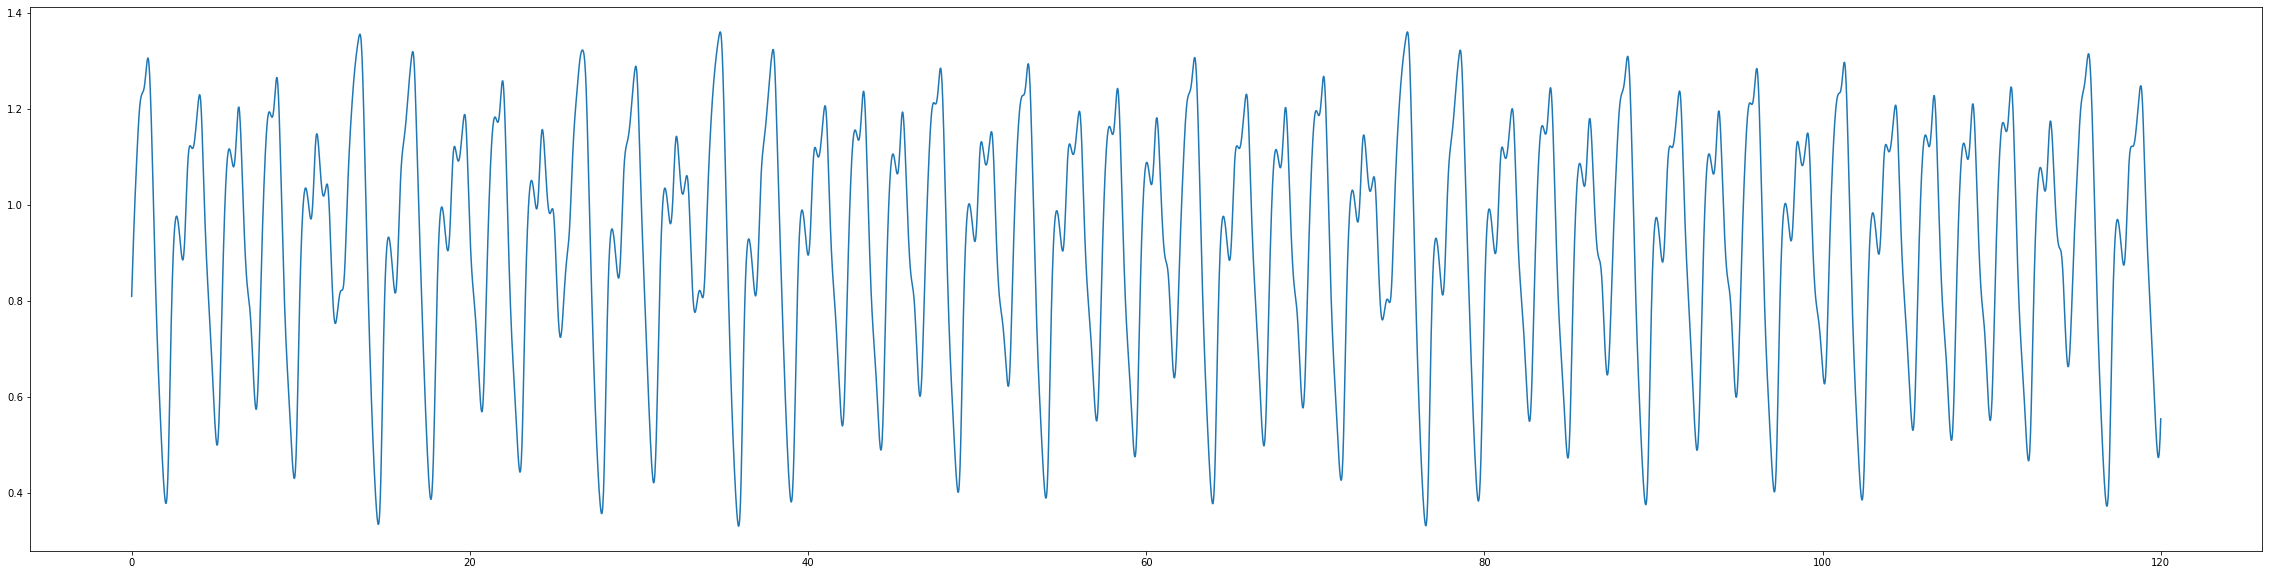

In [40]:
import utils

importlib.reload(utils)

sequence, time = utils.discrete_mackey_glass(epoch=6000)
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figwidth(40)
fig.set_figheight(10)
plt.plot(time, sequence[0])

In [17]:
import model
import importlib

importlib.reload(model)

RP_mg = model.reservoirModel("mackey_glass.config")
print("W_out before_training:\n", RP_mg.W_out)
RP_mg.training()
print("W_out after_training:\n", RP_mg.W_out)

output_mg, _ = RP_mg.run_by_self()

forced_output_mg, _ = RP_mg.run_with_input()

W_out before_training:
 tensor([[4.4711e-01],
        [1.2543e-02],
        [9.1064e-02],
        [8.8068e-01],
        [9.6022e-01],
        [5.5601e-01],
        [4.8660e-01],
        [4.7790e-01],
        [6.5428e-01],
        [3.8725e-01],
        [2.9667e-01],
        [9.1954e-01],
        [5.4012e-01],
        [3.1074e-01],
        [4.2668e-01],
        [9.1945e-01],
        [1.6776e-01],
        [5.2501e-01],
        [7.5513e-01],
        [6.2831e-01],
        [6.6931e-01],
        [5.6457e-01],
        [6.9258e-01],
        [7.3997e-01],
        [6.5889e-01],
        [4.2543e-01],
        [5.3724e-01],
        [1.8999e-01],
        [5.7656e-01],
        [3.3380e-02],
        [7.1231e-02],
        [1.3902e-01],
        [5.3805e-01],
        [2.6847e-01],
        [7.0897e-02],
        [8.1898e-01],
        [2.3286e-01],
        [9.5314e-01],
        [5.3761e-01],
        [6.4477e-01],
        [6.2959e-01],
        [6.2721e-01],
        [4.4211e-01],
        [4.7449e-01],
        

/home/bfish/projects/reservoir2/model.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(self.system_input[epoch])
/home/bfish/projects/reservoir2/model.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(torch.tensor(np.tanh(torch.tensor(np.dot(self.W_reservoir,prev))+torch.tensor(feed_to_reservoir))))
/home/bfish/projects/reservoir2/model.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reference_outputs = torch.tensor(self.system_input[1:self.training_time+1])


W_out after_training:
 tensor([[ 8.9164e-03],
        [ 8.7234e-03],
        [ 3.1311e-04],
        [-2.8431e-02],
        [ 1.6620e-02],
        [ 7.7549e-03],
        [-6.8477e-03],
        [ 3.2489e-03],
        [ 1.0893e-02],
        [-3.1369e-03],
        [-4.3754e-03],
        [ 1.0754e-02],
        [ 1.7824e-02],
        [-8.8303e-03],
        [ 3.2482e-03],
        [ 6.5611e-03],
        [ 1.1385e-02],
        [-1.7176e-02],
        [-2.4858e-02],
        [-5.9998e-03],
        [ 1.3795e-02],
        [-9.5282e-03],
        [ 6.3913e-03],
        [-1.3362e-02],
        [ 6.3809e-03],
        [-1.6324e-02],
        [-3.6058e-03],
        [-1.1830e-02],
        [ 1.4179e-02],
        [ 1.3697e-02],
        [-1.0412e-02],
        [ 1.0415e-02],
        [ 1.7010e-02],
        [ 1.2334e-02],
        [ 2.1422e-02],
        [-1.7832e-02],
        [-1.1689e-02],
        [ 1.3142e-02],
        [ 2.0564e-02],
        [-2.0514e-02],
        [-8.8251e-03],
        [-1.5923e-02],
        [ 6

/home/bfish/projects/reservoir2/model.py:99: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(self.output[-1])
/home/bfish/projects/reservoir2/model.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(torch.tensor(np.tanh(torch.tensor(np.dot(self.W_reservoir,prev))+torch.tensor(feed_to_reservoir))))


In [18]:
import torch

importlib.reload(utils)
# plot of train-and-auto-run
utils.plot_time_sequence(
    RP_mg.training_time - 2000,
    RP_mg.training_time + 2000,
    RP_mg.training_time,
    RP_mg.f,
    torch.tensor(output_mg),
    torch.tensor(sequence).T,
    time,
    1,
)
# plotting a clip from output generated by continued input into trained model
utils.plot_time_sequence(
    RP_mg.training_time - 2000,
    RP_mg.training_time + 2000,
    RP_mg.training_time,
    RP_mg.f,
    torch.tensor(forced_output_mg),
    torch.tensor(sequence).T,
    time,
    1,
)


# utils.plot_time_sequence(0,RP.run_time,RP.f,p,s,time,1)

/tmp/ipykernel_82941/625288792.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  utils.plot_time_sequence(RP_mg.training_time-2000,RP_mg.training_time+2000,RP_mg.training_time,RP_mg.f,torch.tensor(output_mg),torch.tensor(sequence).T,time,1)


/tmp/ipykernel_82941/625288792.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  utils.plot_time_sequence(RP_mg.training_time-2000,RP_mg.training_time+2000,RP_mg.training_time,RP_mg.f,torch.tensor(forced_output_mg),torch.tensor(sequence).T,time,1)
